# Predicting Health Insurance

## Business Understanding
### Background:

In the US, health insurance is important for the financial security of the population. Due to that, companies are trying to improve the enrollment rates among them. Predicting whether a customer is likely to take up insurance can help optimize resource allocation and improve customer engagement strategies.

### Business Objectives:

Build a model to predict which of your customers don’t have health insurance

### Business Success Criteria:

Succefully predict the customers that don't have health insurance according to the provided data.

### Inventory of Resources:

Data: A dataset with demographic and behavioral attributes such as employment status, income, housing type, marital status, and more.

Tools: Python Libraries, Jupiter Notebook.

### Requirements, Assumptions, and Constraints:

Requirements: ???

Assumptions: Data accurately reflects the characteristics of customers.

Constraints: Data imbalance in certain attributes.

### Risks and Contingencies:

Risk: Missing values or noisy data could reduce model accuracy.
Contingency: Data cleaning and preprocessing steps.

### Costs and Benefits:

Costs: Initial setup, data preprocessing and operationalizing the model.
Benefits: Improved conversion rates and data-driven decision-making.

### Data Mining Goals:
Develop a predictive model to classify customers based on their likelihood to purchase health insurance.
Identify the most influential factors that drive insurance uptake.

### Data Mining Success Criteria:

Model accuracy above 80%. 
Identify the top 5 features that influence insurance uptake.

## Data Understanding

### Initial Data Collection and Description:

In [175]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('customer.csv')

df.head()


,Unnamed: 0,custid,sex,is_employed,income,marital_status,health_ins,housing_type,num_vehicles,age,state_of_res,code_column,gas_usage,rooms,recent_move_b
0,7,000006646_03,Male,True,22000.0,Never married,True,Homeowner free and clear,0.0,24,Alabama,1047,210.0,3,F
1,8,000007827_01,Female,NaN,23200.0,Divorced/Separated,True,Rented,0.0,82,Alabama,1047,3.0,6,T
2,9,000008359_04,Female,True,21000.0,Never married,True,Homeowner with mortgage/loan,2.0,31,Alabama,1047,40.0,3,F
3,10,000008529_01,Female,NaN,37770.0,Widowed,True,Homeowner free and clear,1.0,93,Alabama,1047,120.0,2,F
4,11,000008744_02,Male,True,39000.0,Divorced/Separated,True,Rented,2.0,67,Alabama,1047,3.0,2,F


In [176]:
df.shape

(72458, 15)

In [177]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72458 entries, 0 to 72457
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      72458 non-null  int64  
 1   custid          72458 non-null  object 
 2   sex             72458 non-null  object 
 3   is_employed     46943 non-null  object 
 4   income          72458 non-null  float64
 5   marital_status  72458 non-null  object 
 6   health_ins      72458 non-null  bool   
 7   housing_type    70772 non-null  object 
 8   num_vehicles    70772 non-null  float64
 9   age             72458 non-null  int64  
 10  state_of_res    72458 non-null  object 
 11  code_column     72458 non-null  int64  
 12  gas_usage       70772 non-null  float64
 13  rooms           72458 non-null  int64  
 14  recent_move_b   70771 non-null  object 
dtypes: bool(1), float64(3), int64(4), object(7)
memory usage: 7.8+ MB


### Data Exploration:

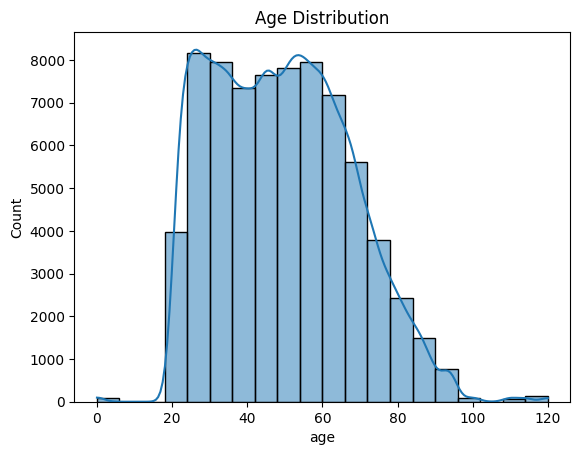

In [178]:
sns.histplot(df['age'], kde=True, bins=20)
plt.title('Age Distribution')   
plt.show()


Most of the customers are young or early 40s, between 18 and 45 years old.

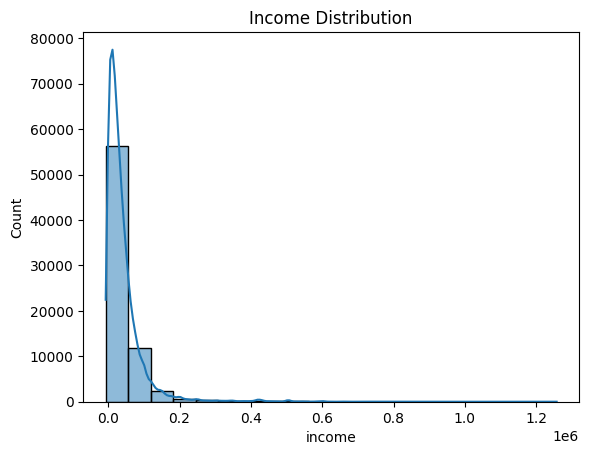

In [179]:
sns.histplot(df['income'], kde=True, bins=20)
plt.title('Income Distribution')
plt.show()

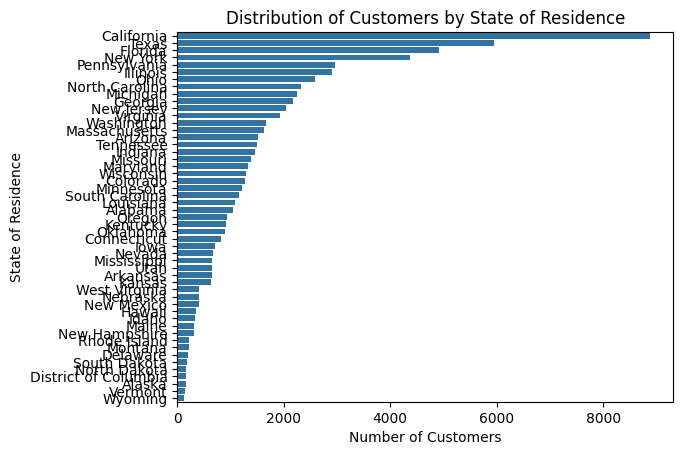

In [180]:
sns.countplot(y='state_of_res', data=df, order=df['state_of_res'].value_counts().index)
plt.title('Distribution of Customers by State of Residence')
plt.xlabel('Number of Customers')
plt.ylabel('State of Residence')
plt.show()

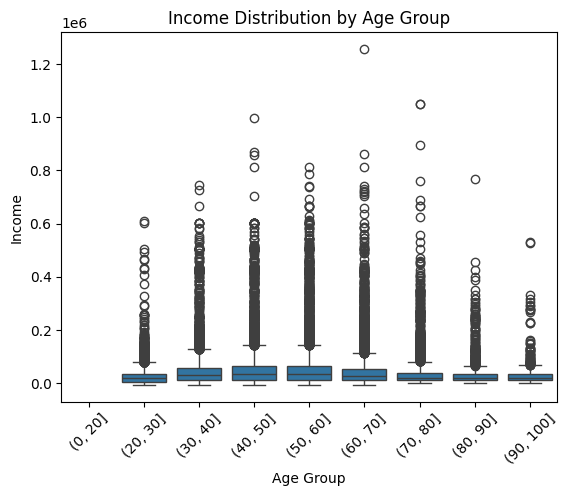

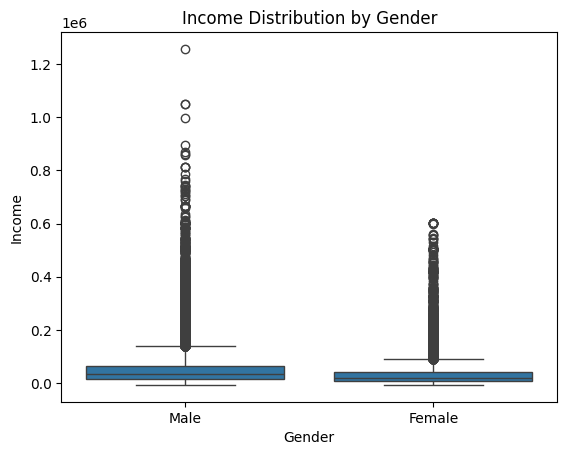

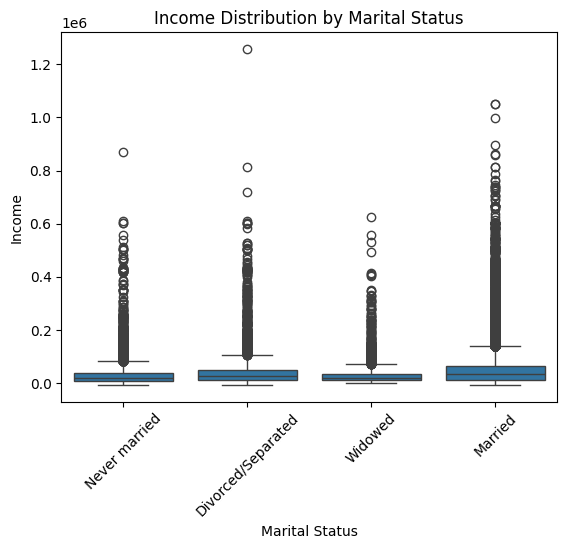

In [181]:
# Boxplot for income by age group
sns.boxplot(x=pd.cut(df['age'], bins=[0, 20, 30, 40, 50, 60, 70, 80, 90, 100]), y='income', data=df)
plt.title('Income Distribution by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Income')
plt.xticks(rotation=45)
plt.show()

# Boxplot for income by gender
sns.boxplot(x='sex', y='income', data=df)
plt.title('Income Distribution by Gender')
plt.xlabel('Gender')
plt.ylabel('Income')
plt.show()

# Boxplot for income by marital status
sns.boxplot(x='marital_status', y='income', data=df)
plt.title('Income Distribution by Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Income')
plt.xticks(rotation=45)
plt.show()



In [182]:
encoded_df = pd.get_dummies(df, columns=['housing_type'], prefix='', prefix_sep='')

encoded_df = encoded_df.rename(columns={
  'Homeowner free and clear' : 'Homeowner_free_and_clear',
  'Homeowner with mortgage/loan' : 'Homeowner_with_mortgage_loan',
  'Occupied with no rent' : 'Occupied_with_no_rent',
  'Rented': 'Rented',
})
aux = df['housing_type']
df = encoded_df 
df['housing_type'] = aux

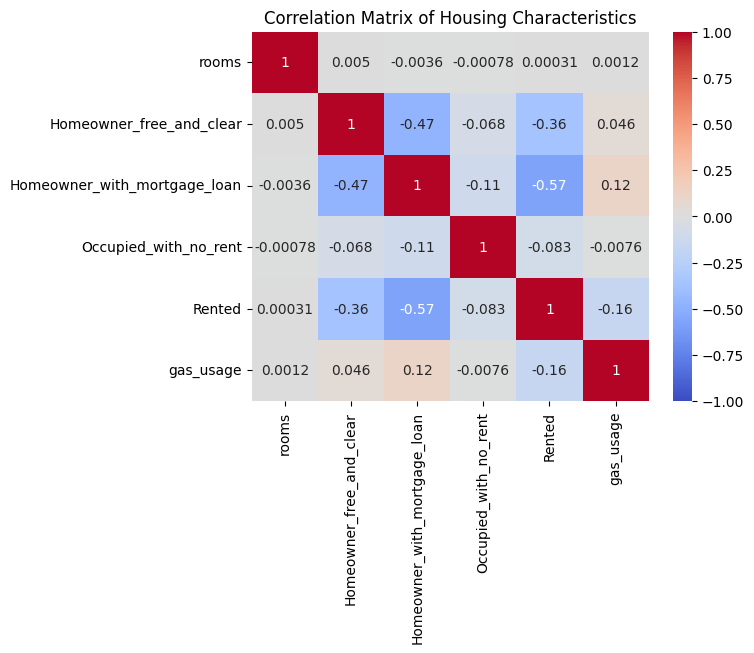

In [183]:


correlation_matrix = df[['rooms','Homeowner_free_and_clear','Homeowner_with_mortgage_loan','Occupied_with_no_rent','Rented' , 'gas_usage']].corr()

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix of Housing Characteristics')
plt.show()

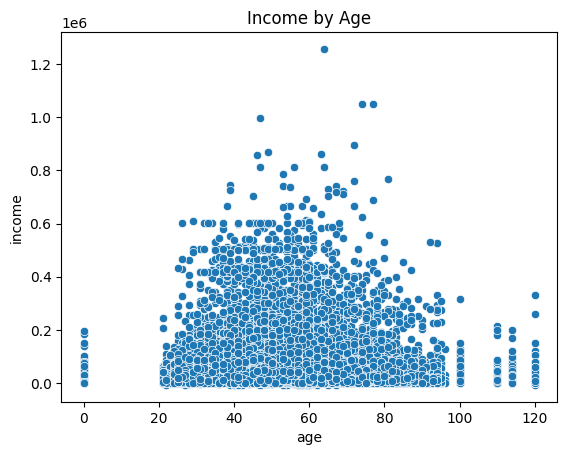

In [184]:
sns.scatterplot(x='age', y='income', data=df)

plt.title('Income by Age')
plt.show()


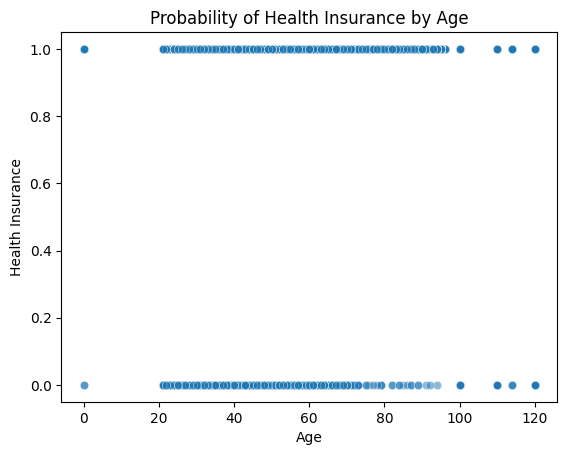

In [185]:
sns.scatterplot(x='age', y='health_ins', data=df, alpha=0.5)
plt.title('Probability of Health Insurance by Age')
plt.xlabel('Age')
plt.ylabel('Health Insurance')
plt.show()

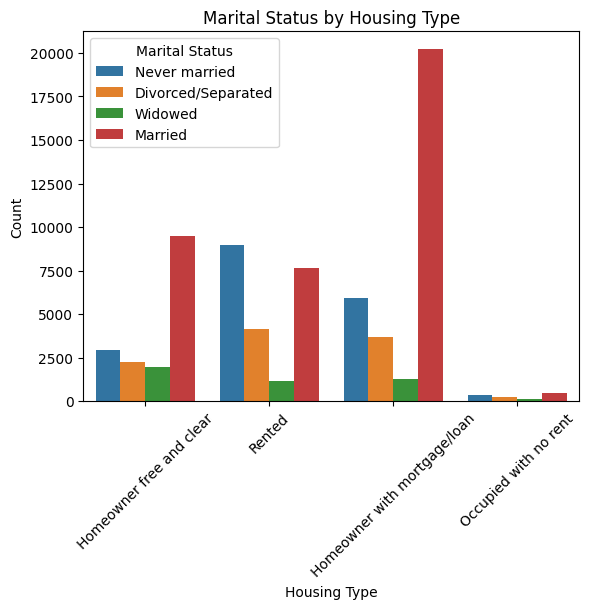

In [186]:
sns.countplot(x='housing_type', hue='marital_status', data=df)
plt.title('Marital Status by Housing Type')
plt.xlabel('Housing Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Marital Status')
plt.show()

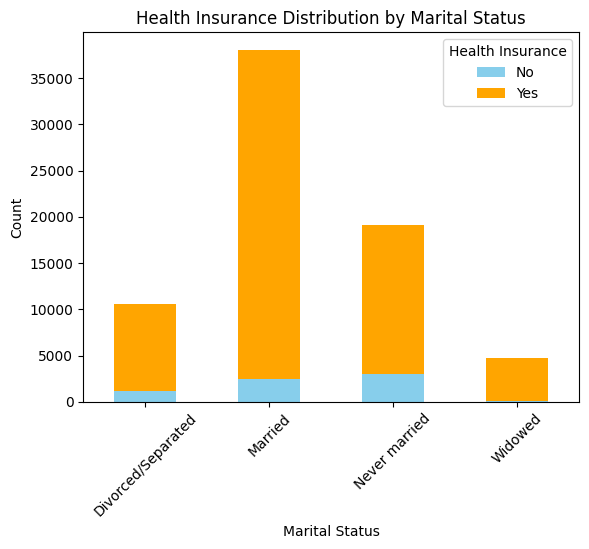

In [187]:
aux_df = pd.crosstab(df['marital_status'], df['health_ins'])

aux_df.plot(kind='bar', stacked=True, color=['skyblue', 'orange'])
plt.title('Health Insurance Distribution by Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.legend(title='Health Insurance', labels=['No', 'Yes'])
plt.xticks(rotation=45)
plt.show()

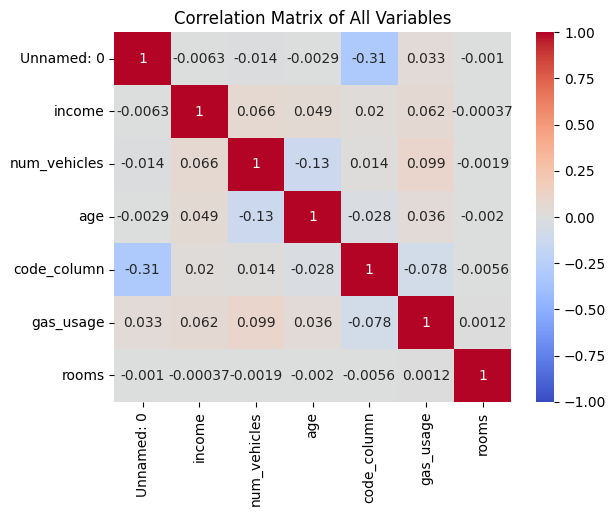

In [188]:
numeric_df = df.select_dtypes(include=[np.number])

correlation_matrix_all = numeric_df.corr()

sns.heatmap(correlation_matrix_all, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix of All Variables')
plt.show()


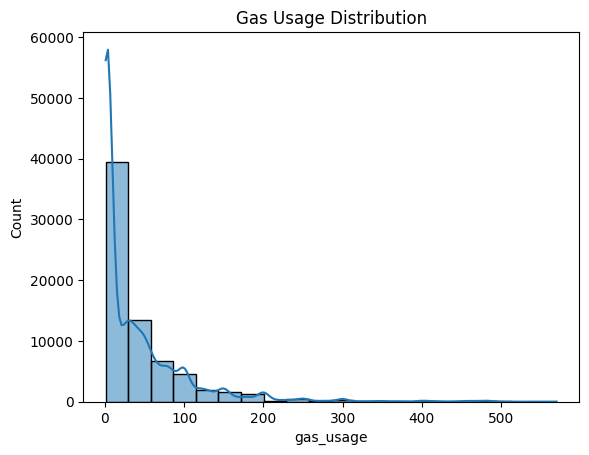

In [189]:
sns.histplot(df['gas_usage'], kde=True, bins=20)
plt.title('Gas Usage Distribution')
plt.show()

In [190]:
df.isnull().sum()

Unnamed: 0                          0
custid                              0
sex                                 0
is_employed                     25515
income                              0
marital_status                      0
health_ins                          0
num_vehicles                     1686
age                                 0
state_of_res                        0
code_column                         0
gas_usage                        1686
rooms                               0
recent_move_b                    1687
Homeowner_free_and_clear            0
Homeowner_with_mortgage_loan        0
Occupied_with_no_rent               0
Rented                              0
housing_type                     1686
dtype: int64

## Data Preparation

In [191]:
# drop rows with age == 0 or age == 120
df = df[df["age"] != 0]
df = df[df["age"] != 120]

In [192]:
df.rename({'Unnamed: 0':'idx'}, axis=1, inplace=True)
df.set_index("idx", inplace = True)
df.head()



,custid,sex,is_employed,income,marital_status,health_ins,num_vehicles,age,state_of_res,code_column,gas_usage,rooms,recent_move_b,Homeowner_free_and_clear,Homeowner_with_mortgage_loan,Occupied_with_no_rent,Rented,housing_type
idx,,,,,,,,,,,,,,,,,,
7,000006646_03,Male,True,22000.0,Never married,True,0.0,24,Alabama,1047,210.0,3,F,True,False,False,False,Homeowner free and clear
8,000007827_01,Female,NaN,23200.0,Divorced/Separated,True,0.0,82,Alabama,1047,3.0,6,T,False,False,False,True,Rented
9,000008359_04,Female,True,21000.0,Never married,True,2.0,31,Alabama,1047,40.0,3,F,False,True,False,False,Homeowner with mortgage/loan
10,000008529_01,Female,NaN,37770.0,Widowed,True,1.0,93,Alabama,1047,120.0,2,F,True,False,False,False,Homeowner free and clear
11,000008744_02,Male,True,39000.0,Divorced/Separated,True,2.0,67,Alabama,1047,3.0,2,F,False,False,False,True,Rented


In [193]:
df.is_employed.value_counts(dropna=False)

is_employed
True     44547
NaN      25459
False     2309
Name: count, dtype: int64

In [194]:
df['is_employed'] = df['is_employed'].fillna(False)
df.head()

C:\Users\sjose\AppData\Local\Temp\ipykernel_10376\2175004513.py:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['is_employed'] = df['is_employed'].fillna(False)


,custid,sex,is_employed,income,marital_status,health_ins,num_vehicles,age,state_of_res,code_column,gas_usage,rooms,recent_move_b,Homeowner_free_and_clear,Homeowner_with_mortgage_loan,Occupied_with_no_rent,Rented,housing_type
idx,,,,,,,,,,,,,,,,,,
7,000006646_03,Male,True,22000.0,Never married,True,0.0,24,Alabama,1047,210.0,3,F,True,False,False,False,Homeowner free and clear
8,000007827_01,Female,False,23200.0,Divorced/Separated,True,0.0,82,Alabama,1047,3.0,6,T,False,False,False,True,Rented
9,000008359_04,Female,True,21000.0,Never married,True,2.0,31,Alabama,1047,40.0,3,F,False,True,False,False,Homeowner with mortgage/loan
10,000008529_01,Female,False,37770.0,Widowed,True,1.0,93,Alabama,1047,120.0,2,F,True,False,False,False,Homeowner free and clear
11,000008744_02,Male,True,39000.0,Divorced/Separated,True,2.0,67,Alabama,1047,3.0,2,F,False,False,False,True,Rented


In [195]:
df['income'] = df['income'].fillna(df['income'].median())

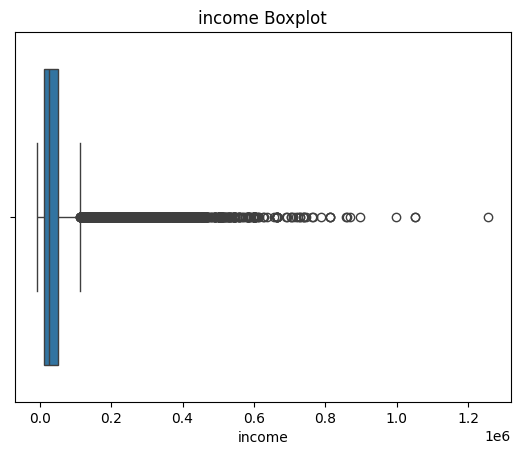

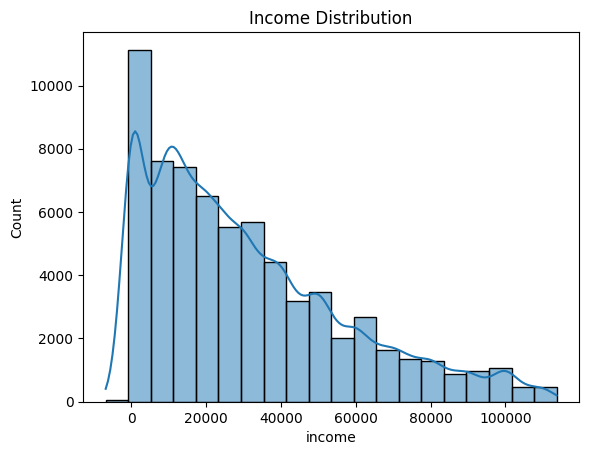

In [196]:
sns.boxplot(x='income',data=df)
plt.title('income Boxplot')

plt.show()

Q1 = df['income'].quantile(0.25)
Q3 = df['income'].quantile(0.75)
IQR = Q3 - Q1

df = df[(df['income'] > (Q1 - 1.5 * IQR)) & (df['income'] < (Q3 + 1.5 * IQR))]

sns.histplot(df['income'], kde=True, bins=20)
plt.title('Income Distribution')

plt.show()

In [197]:
df['income']= (df['income'] - df['income'].mean()) / df['income'].std()

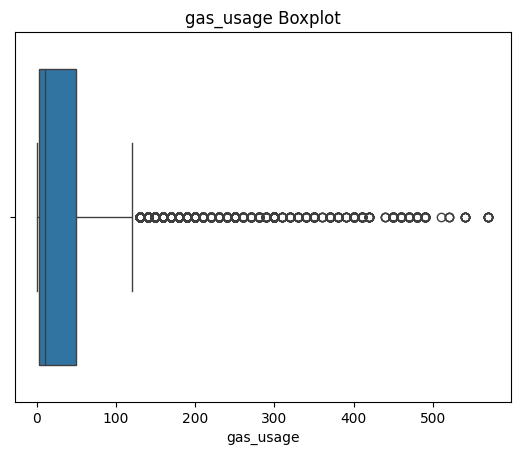

In [198]:
sns.boxplot(x='gas_usage',data=df)
plt.title('gas_usage Boxplot')

plt.show()


In [ ]:
df['gas_usage'] = df['gas_usage'].fillna(df[df['gas_usage'] > 3]['gas_usage'].mean())


gas_usage
False    67803
Name: count, dtype: int64

In [200]:
df['housing_type'] = df['housing_type'].fillna(df['housing_type'].mode()[0])


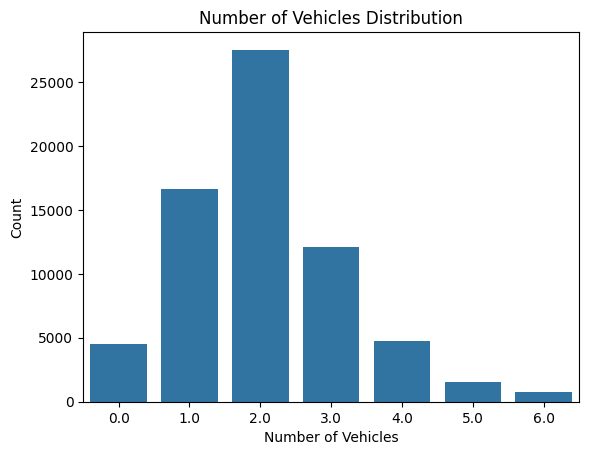

In [201]:
df['num_vehicles'] = df['num_vehicles'].fillna(round(df['num_vehicles'].mean(),0))

sns.countplot(x='num_vehicles', data=df)
plt.title('Number of Vehicles Distribution')
plt.xlabel('Number of Vehicles')
plt.ylabel('Count')
plt.show()

In [202]:
df['recent_move_b'].value_counts()

df['recent_move_b'] = df['recent_move_b'].replace({'T': True, 'F': False})

df['recent_move_b'] = df['recent_move_b'].fillna(df['recent_move_b'].mode()[0])

C:\Users\sjose\AppData\Local\Temp\ipykernel_10376\3084544823.py:5: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['recent_move_b'] = df['recent_move_b'].fillna(df['recent_move_b'].mode()[0])


In [203]:
df.drop(columns=['state_of_res'],inplace=True)
df.drop(columns=['housing_type'],inplace=True)

In [204]:

encoded_df = pd.get_dummies(df, columns=['marital_status'], prefix='', prefix_sep='')

encoded_df = encoded_df.rename(columns={
    'Divorced/Separated': 'Divorced_Separated',
    'Married': 'Married',
    'Never married': 'Never_married',
    'Widowed': 'Widowed'
})

df = encoded_df

df.drop(columns=['Never_married'],inplace=True)

In [205]:
encoded_df = pd.get_dummies(df, columns=['sex'], prefix='', prefix_sep='')


df = encoded_df

df.drop(columns=['Female'],inplace=True)    

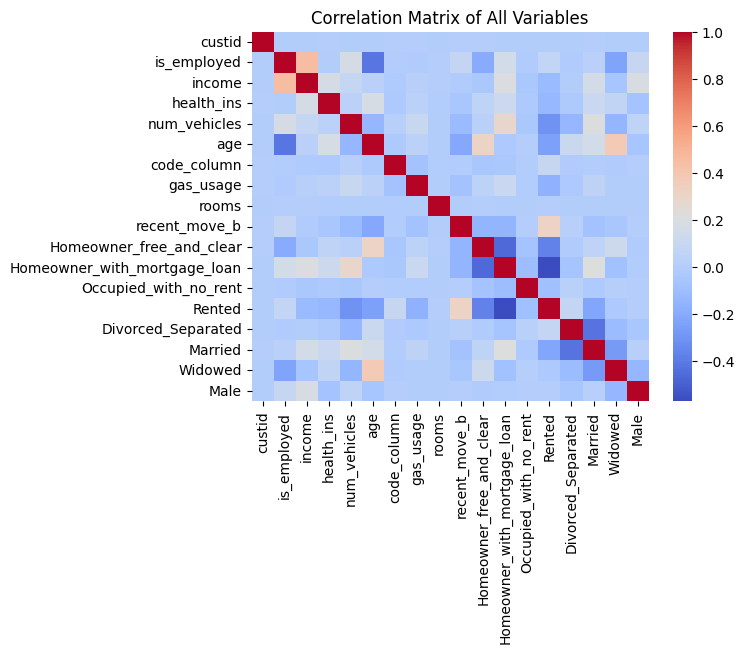

In [206]:
correlation_matrix = df.corr()

sns.heatmap(correlation_matrix, cmap='coolwarm',)
plt.title('Correlation Matrix of All Variables')
plt.show()


In [207]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

X = df.drop(columns='health_ins')  
y = df['health_ins']  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)


In [208]:
print("Original class distribution:")
print(y_train.value_counts())
print("\nResampled class distribution:")
print(pd.Series(y_resampled).value_counts())

Original class distribution:
health_ins
True     48741
False     5501
Name: count, dtype: int64

Resampled class distribution:
health_ins
True     48741
False    48741
Name: count, dtype: int64


In [209]:
df

,custid,is_employed,income,health_ins,num_vehicles,age,code_column,gas_usage,rooms,recent_move_b,Homeowner_free_and_clear,Homeowner_with_mortgage_loan,Occupied_with_no_rent,Rented,Divorced_Separated,Married,Widowed,Male
idx,,,,,,,,,,,,,,,,,,
7,000006646_03,True,-0.333244,True,0.0,24,1047,210.000000,3,False,True,False,False,False,False,False,False,True
8,000007827_01,False,-0.287999,True,0.0,82,1047,3.000000,6,True,False,False,False,True,True,False,False,False
9,000008359_04,True,-0.370949,True,2.0,31,1047,40.000000,3,False,False,True,False,False,False,False,False,False
10,000008529_01,False,0.261349,True,1.0,93,1047,120.000000,2,False,True,False,False,False,False,False,True,False
11,000008744_02,True,0.307725,True,2.0,67,1047,3.000000,2,False,False,False,False,True,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99996,001506841_02,True,-0.465209,False,1.0,25,131,10.000000,4,False,False,False,False,True,False,False,False,False
99997,001507219_01,False,-0.378489,True,1.0,86,131,120.000000,6,False,True,False,False,False,False,False,True,False
99998,001513103_01,True,1.665073,True,2.0,50,131,90.000000,3,False,False,True,False,False,False,True,False,True


## Modeling

Accuracy: 0.44
              precision    recall  f1-score   support

       False       0.10      0.62      0.18      1315
        True       0.91      0.42      0.58     12246

    accuracy                           0.44     13561
   macro avg       0.51      0.52      0.38     13561
weighted avg       0.83      0.44      0.54     13561



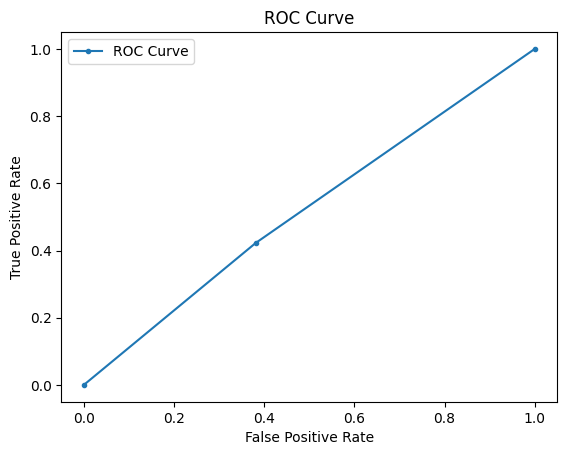

In [210]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve

model = GaussianNB()
model.fit(X_resampled, y_resampled)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

class_report = classification_report(y_test, y_pred)
print(class_report)

fpr, tpr, _ = roc_curve(y_test, y_pred)

plt.plot(fpr, tpr, marker='.', label='ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()



### Authors: 

- José Santos up202108729
- Luís Du up202105385
- Athos Freitas up202108792